<a href="https://colab.research.google.com/github/HeribertoGodoy/Tareas-EIE-401-/blob/main/Proyectos/%20Proyecto%201/%20Proyecto_1_GodoyHeriberto_203197551.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Proyecto 1</h2></center>
<center><h3>Procesamiento digital de señales</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Heriberto Godoy</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


In [1]:
from IPython.display import IFrame, display
filepath = "Proyecto_1_EIE401.pdf"
IFrame(filepath, width=700, height=400)

Debes usar el sitio https://gwosc.org/eventapi/html/GWTC/, donde encuentras todo el catálogo de observaciones con los datos en diferentes formatos. Debes seleccionar una detección para tu estudio y descargar los datos correspondientes (H5 o TXT), lo que posteriormente deberás tratar de manera digital como audio (serie de tiempo).
tip: Te recomiendo tomar la serie de tiempo corta (32 segundos) para facilitar el análisis, y asegurarte de tomar la tasa de muestreo más alta.
tip: Asegúrate de tomar un caso cuyo espectrograma de muestra, indique una señal clara y fuerte para facilitar tu trabajo, de otra forma es posible que no logres aislarla lo suficiente.


## 1. Carga de Datos


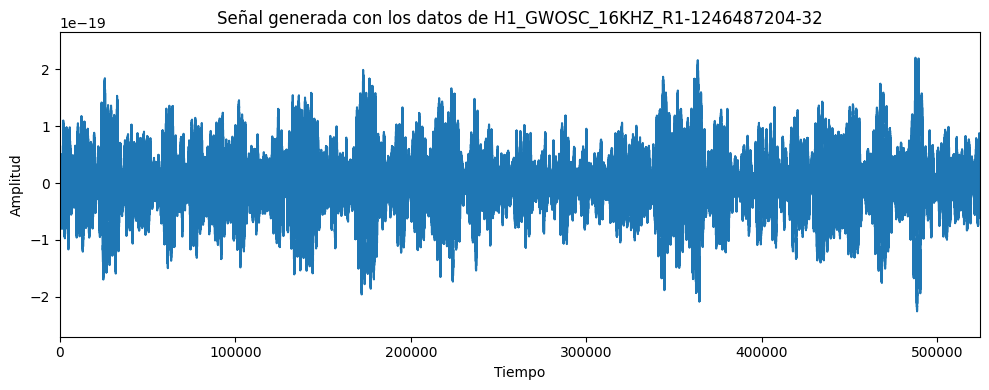

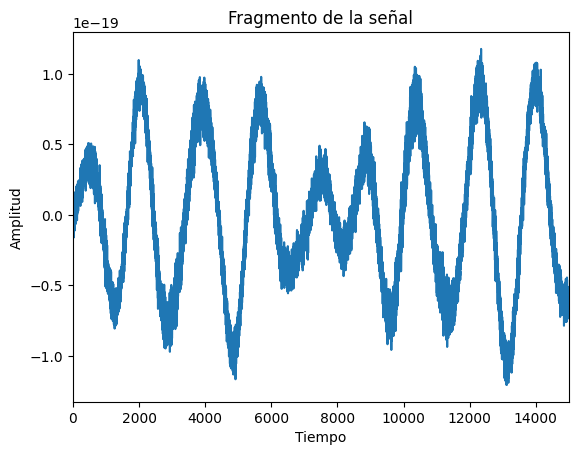

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo de texto
archivo = '/content/H-H1_GWOSC_16KHZ_R1-1246487204-32.txt'
datos = np.loadtxt(archivo, delimiter=',', skiprows=3, dtype=float)

# Crear el gráfico
plt.figure(figsize=(10, 4))
plt.plot(datos)

# Ajustar los límites de los ejes para mejorar la visualización
plt.xlim(0, len(datos))
plt.ylim(np.min(datos) - 0.1*(np.max(datos)-np.min(datos)), np.max(datos) + 0.1*(np.max(datos)-np.min(datos)))
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal generada con los datos de H1_GWOSC_16KHZ_R1-1246487204-32')
plt.grid(False)
plt.tight_layout()
plt.show()

# Mostrar solo los primeros 15000 datos
plt.plot(datos[:15000])
plt.xlim(0, 15000)
plt.title('Fragmento de la señal')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.show()



## 2. Convertir en audio
Es una forma de validar que tenemos un alto componente de ruido en la señal y que el interés es eliminarlo para encontrar una señal candidata.

Te recomiendo hacer una señal de audio de cada uno de las etapas para así validar como va el proceso. Al final deberás obtener un señal con CHIRP o BUMP. Son sonidos que comprueban que tienes una cantidad de potencia que sobre destaca sobre el ruido.

In [3]:
from scipy.io.wavfile import write
from IPython.display import Audio

fs= 16000

# Escalar los datos para que estén dentro del rango de valores del audio (generalmente entre -1 y 1)
datos_normalizados = datos / np.max(np.abs(datos))

# Convertir los datos normalizados a un archivo de audio WAV
write('audio.wav', fs, datos_normalizados)

# Reproducir el archivo de audio
# Reproducir audio
Audio(data=datos_normalizados, rate=fs)


## 3. Análisis de Fourier
Al realizar la conversión, queremos ver cuales son las componentes de ruido que más afectan al instrumento y debemos ignorar en el análisis. Eso se ve como "pico" o la apariencia de "peine". Se debe presenta la densidad espectral de potencia antes y después de la función de Windowing.

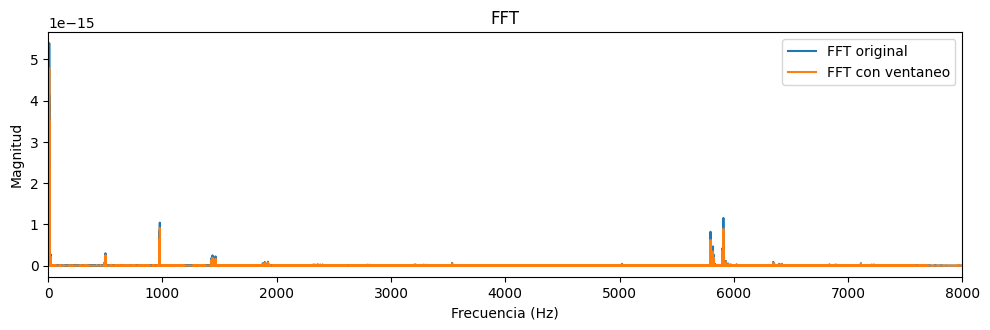

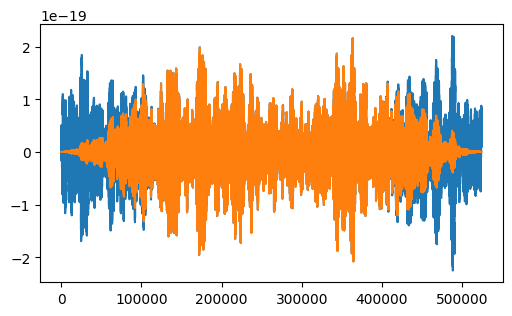

In [62]:
from scipy.signal.windows import tukey
from scipy.fft import fft

# Calcular la FFT de los datos originales
fft_datos = fft(datos)

# Calcular la longitud de la señal
N = len(datos)

# Crear una ventana Tukey
alpha = 0.5  # Parámetro de forma de la ventana Tukey
window = tukey(N, alpha)

# Aplicar la ventana Tukey a los datos
datos_con_ventana = datos * window

# Calcular la FFT de los datos con la ventana Tukey aplicada
fft_datos_con_ventana = fft(datos_con_ventana)

# Definir la frecuencia de muestreo para la FFT
fs = 16000

# Calcular las frecuencias correspondientes a las muestras de la FFT
frecuencias = np.fft.fftfreq(N, d=1/fs)

# Graficar la magnitud de la FFT de los datos originales y con ventana Tukey aplicada
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(frecuencias[:N//2], np.abs(fft_datos)[:N//2], label='FFT original')
plt.plot(frecuencias[:N//2], np.abs(fft_datos_con_ventana)[:N//2], label='FFT con ventaneo')
plt.legend()
plt.title('FFT')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(0, fs/2)
plt.tight_layout()

plt.show()

# Graficar los datos originales y con ventana Tukey aplicada
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.plot(datos, label= 'Datos originales')
plt.plot(datos_con_ventana, label='Datos con ventaneo')
plt.legend
plt.tight_layout()
plt.show()



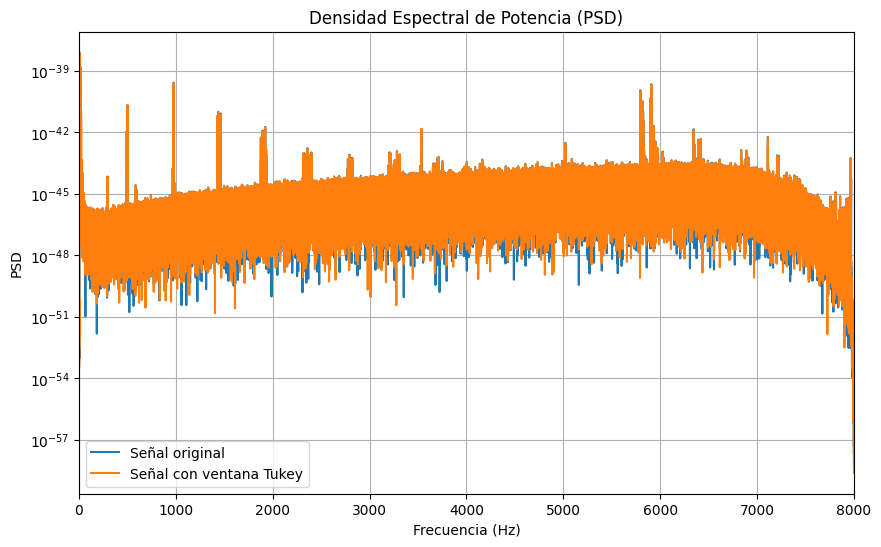

In [63]:
from scipy.signal import welch

# Calcular la densidad espectral de potencia (PSD) de la señal original
frecuencias_psd, psd_original = welch(datos, fs, nperseg=N)

# Calcular la densidad espectral de potencia (PSD) de la señal con ventana Tukey aplicada
frecuencias_psd_ventana, psd_ventana = welch(datos_con_ventana, fs, nperseg=N)

# Graficar la densidad espectral de potencia de la señal original y de la señal con ventana Tukey aplicada
plt.figure(figsize=(10, 6))
plt.semilogy(frecuencias_psd, psd_original, label='Señal original')
plt.semilogy(frecuencias_psd_ventana, psd_ventana, label='Señal con ventana Tukey')
plt.title('Densidad Espectral de Potencia (PSD)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD')
plt.legend()
plt.xlim(0, fs/2)
plt.grid(True)
plt.show()


In [64]:
 from IPython.display import Audio

# Reproducir el archivo de audio windowed
Audio(data=datos_con_ventana, rate=fs)

## 4. Procesamiento
Debes inferir de tu estudio, cual es el proceso que aplican a la señal y reproducirlo. Es posible que cada estudiante llegue a una solución más o menos diferente, pues no hay un código abierto donde esté el procedimiento completo.


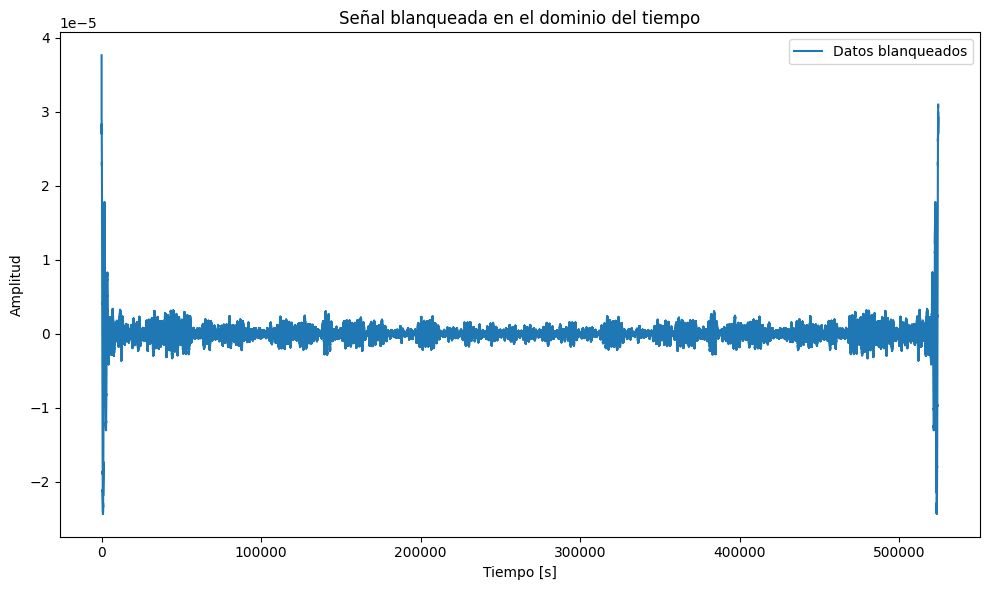

In [66]:
import numpy as np
from scipy.fftpack import fft, ifft

# Suavizar la señal con un filtro de media móvil
ventana = np.ones(10)/10
datos_suavizados = np.convolve(datos_con_ventana, ventana, mode='same')

# Luego, puedes continuar con tu código existente...
fft_resultado = fft(datos_suavizados)

# Calcula la potencia espectral
potencia_espectral = np.abs(fft_resultado)**2

# Normaliza la potencia espectral
potencia_espectral_normalizada = potencia_espectral / np.sum(potencia_espectral)

# Aplica la Transformada Rápida de Fourier inversa para obtener la señal blanqueada
datos_blanqueados = ifft(np.sqrt(potencia_espectral_normalizada))

# La parte real de 'datos_blanqueados' es tu señal de audio blanqueada
señal_blanqueada = np.real(datos_blanqueados)


# Graficar los datos blanqueados en el dominio del tiempo
plt.figure(figsize=(10, 6))
plt.plot(señal_blanqueada, label='Datos blanqueados')
plt.title('Señal blanqueada en el dominio del tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.tight_layout()
plt.show()



In [98]:
from scipy.signal import butter

# Define las frecuencias de corte para el filtro pasabanda
lowcut = 5650
highcut = 5950

# Define el orden del filtro
order = 4

# Define la frecuencia de muestreo
fs = 16000

# Normaliza las frecuencias de corte por la frecuencia de Nyquist (la mitad de la frecuencia de muestreo)
low = lowcut / (0.5 * fs)
high = highcut / (0.5 * fs)

# Crea el filtro pasabanda Butterworth
b, a = butter(order, [low, high], btype='band')




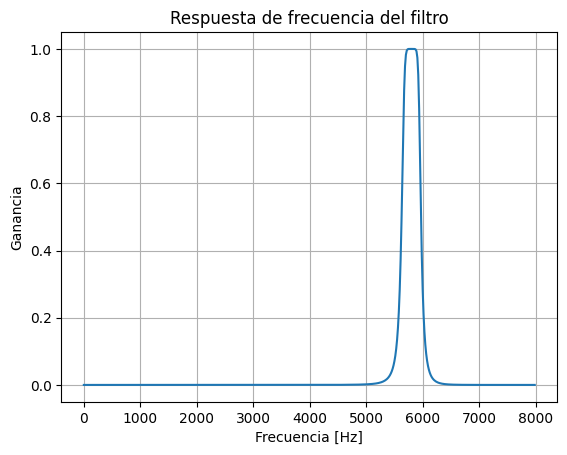

In [99]:
from scipy.signal import freqz
import matplotlib.pyplot as plt

w, h = freqz(b, a, fs=fs)
plt.plot(w, abs(h))
plt.title('Respuesta de frecuencia del filtro')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Ganancia')
plt.grid(True)
plt.show()

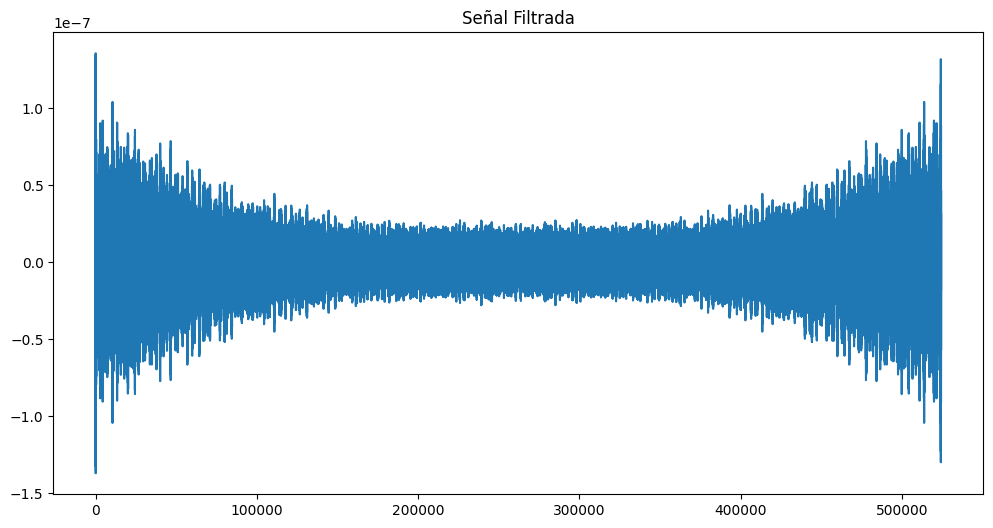

In [100]:
from scipy.signal import filtfilt

# Aplica el filtro a la señal blanqueada
señal_filtrada = filtfilt(b, a, señal_blanqueada)

# Grafica la señal filtrada
plt.figure(figsize=(12, 6))
plt.plot(señal_filtrada)
plt.title('Señal Filtrada')

plt.show()


In [101]:
from IPython.display import Audio

# Reproducir el archivo de audio windowed
Audio(data=señal_filtrada, rate=fs)

# Resampling
Para lograr una mejor definición de la señal, se debe hacer un resampleo. Esto tienen consecuencias por eso debe elegirse bien la frecuencia de tal forma que no se introduzca ruido.

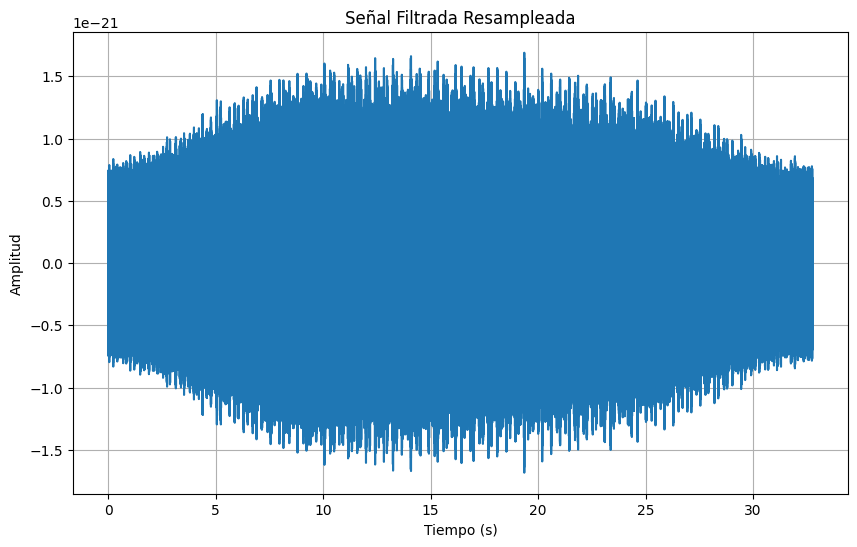

In [102]:
from scipy.signal import resample

# Definir la nueva frecuencia de muestreo deseada
nueva_frecuencia_muestreo = 44100

# Realizar el resampleo de la señal filtrada
datos_filtrados_resampleados = resample(datos_filtrados, int(len(datos_filtrados) * nueva_frecuencia_muestreo / fs))

# Crear un arreglo de tiempo para el nuevo muestreo
tiempo_resampleado = np.arange(len(datos_filtrados_resampleados)) / nueva_frecuencia_muestreo

# Graficar la señal resampleada
plt.figure(figsize=(10, 6))
plt.plot(tiempo_resampleado, datos_filtrados_resampleados)
plt.title('Señal Filtrada Resampleada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()



In [56]:
from IPython.display import Audio

# Reproducir el audio resampleado
Audio(data=datos_filtrados_resampleados, rate=nueva_frecuencia_muestreo)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


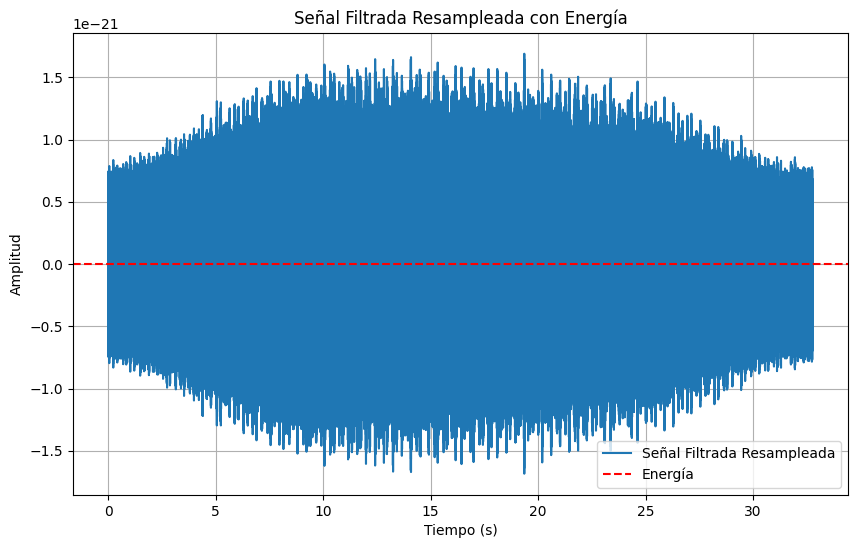

In [57]:
# Calcular la energía de la señal resampleada
energia_resampleada = np.sum(np.square(datos_filtrados_resampleados))

# Graficar la señal resampleada junto con la energía
plt.figure(figsize=(10, 6))
plt.plot(tiempo_resampleado, datos_filtrados_resampleados, label='Señal Filtrada Resampleada')
plt.axhline(y=energia_resampleada, color='r', linestyle='--', label='Energía')
plt.title('Señal Filtrada Resampleada con Energía')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()



No pude terminar el trabajo, la verdad creo que empiezo a tener problemas desde el blanqueo de la señal y no supe como solucionarlo por lo que solo entregare este archivo :( disculpe